In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Start with the smaller table that only contains countries
Load generated tsv file from the eurostat website <br>
Replace colons (':') with NaN

In [197]:
df = pd.read_csv('Input Data/crop_prod_data.tsv', sep='\t', header=0, encoding="ISO-8859-1")

In [198]:
df=df.replace(":",np.nan)

Split the first column into three <br> 
Move them to the front <br>
Dispose of the original column

In [199]:
df[['shapeId','comdty','param']]=df['GEO,CROPS,STRUCPRO\TIME'].str.rsplit(",",2,expand=True)

In [200]:
df=df[['shapeId','comdty','param','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]

**Unicodedata - library used to latinize strings** <br>
Function takes string as input <br>
Applies normalize (latinize) method to it <br>
Encodes as ASCII while dropping error characters if any persist <br>
Returns an utf-8 decoded string that has no non-ascii characters <br>
Use the function to remove special charaters from the 'shapeId' column

In [201]:
import unicodedata
def remove_accents(input_str):
    form=unicodedata.normalize('NFKD',input_str)
    only_ascii=form.encode('ASCII','ignore')
    return only_ascii.decode('utf-8')
df['shapeId']=df['shapeId'].apply(remove_accents)

* Split the dataframe into two
* Create a dictionary of dataframes for each year in the table
* Iterate over every year in the dataframe
* Concatenate its' column values with the dataframe that consists of param and comdty attributes 
* Rename the **'year'** column into **'value'**
* Create a date column and add the corresponding date to it

In [202]:
df_main=df.iloc[:,:3]
df_year = df.iloc[:,3:]
df_date_merge={}
for (columnName, columnData) in df_year.iteritems():
    df_date_merge[columnName]=pd.concat([df_main,df_year[columnName]],axis=1)
    df_date_merge[columnName]=df_date_merge[columnName].rename(columns={columnName:'value'})
    df_date_merge[columnName].insert(loc=0,column='date',value=columnName+'-01-01 00:00:00')   

Create empty data frame that will house all yearly dataframes <br>
Iterate over each dataframe in the dictionary <br> 
Concatenate it to the final dataframe

In [203]:
df = pd.DataFrame()
for key,frame in df_date_merge.items():
    df=pd.concat([df,frame],ignore_index=True,sort=False)

Change **'date'** columns' datatype to **'datetime'** <br>
Remove all non digit elements from the value column except periods ('.')

In [204]:
df['date']=pd.to_datetime(df['date'])
df['value'].replace(regex=True, inplace=True, to_replace=r'[^\d.]',  value=r'')

In [205]:
df['value']=pd.to_numeric(df['value'],errors='coerce')

In [206]:
df.insert(loc=1, column='dateRelease', value='2021-09-23 00:00:00')
df['dateRelease']=pd.to_datetime(df['dateRelease'])

Write the DataFrame to a csv and tsv file

In [207]:
df.to_csv('Output Data/crop_prod_eu_stand_humidity.csv')
df.to_csv('Output Data/crop_prod_eu_stand_humidity.tsv')

Create a dictionary of date values for convenience 

In [208]:
date={
    '2012':'2012-01-01',
    '2013':'2013-01-01',
    '2014':'2014-01-01',
    '2015':'2015-01-01',
    '2016':'2016-01-01',
    '2017':'2017-01-01',
    '2018':'2018-01-01',
    '2019':'2019-01-01',
    '2020':'2020-01-01',
    '2021':'2021-01-01',
}

Save params and comdty unique values to a list

In [209]:
params=df['param'].drop_duplicates().tolist()
comdty=df['comdty'].drop_duplicates().tolist()

**Count all non-zero values for each year** <br>
iterate over each year in the dictionary of years <br>
take into account every row that has the corresponding year value <br>
as well as a non-zero value

In [210]:
print("Non zero values for each year:")
for key,value in date.items():
    print(key, '->',df.loc[(df['date']==value)&(df['value']>0), 'value'].count())

Non zero values for each year:
2012 -> 615
2013 -> 609
2014 -> 627
2015 -> 622
2016 -> 656
2017 -> 652
2018 -> 649
2019 -> 651
2020 -> 619
2021 -> 421


**Find the country with the biggest harvest of each commodity**<br>
Iterate over all commodities and years, select maximum value.

In [211]:
df_max=[]
for com in comdty:
    for key,value in date.items():
        df_max.append(df.loc[(df['date']==value)&(df['param']=='Harvested production in EU standard humidity (1000 t)')&(df['comdty']==com),['value','date','shapeId','param','comdty']].max(skipna=True))
        

In [212]:
pd.DataFrame(df_max)

,value,date,shapeId,param,comdty
0,133836.61,2012-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
1,144121.91,2013-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
2,157071.34,2014-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
3,42252.93,2015-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
4,144745.44,2016-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
5,151549.89,2017-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
6,137908.11,2018-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
7,155452.56,2019-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
8,125193.50,2020-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt
9,37838.53,2021-01-01,United Kingdom,Harvested production in EU standard humidity (...,Wheat and spelt


United Kingdom seems to be the biggest harvester every year in each category!

If values correspoding to the Drum wheat commodity and yield param <br>
had a Gaussian distribution we could see how many values fall within<br> an interval **\[Mean-var;Mean+var\]** <br> <br>
Select all rows with the yield parameter and durum wheat commodity

In [214]:
df_dw_y=df.loc[(df['param']=='Yield in EU standard humidity (tonne/ha)') & (df['comdty']=='Durum wheat')]

Select all rows that belong to the interval

In [215]:
df_dw_y.loc[(df_dw_y['value']>df_dw_y.mean().values[0]-df_dw_y.std().values[0]*df_dw_y.std().values[0]) & (df_dw_y['value']<df_dw_y.mean().values[0]+df_dw_y.std().values[0]*df_dw_y.std().values[0])]

,date,dateRelease,shapeId,comdty,param,value
906,2012-01-01,2021-09-23,Bulgaria,Durum wheat,Yield in EU standard humidity (tonne/ha),2.78
909,2012-01-01,2021-09-23,Germany (until 1990 former territory of the FRG),Durum wheat,Yield in EU standard humidity (tonne/ha),4.92
912,2012-01-01,2021-09-23,Greece,Durum wheat,Yield in EU standard humidity (tonne/ha),2.84
914,2012-01-01,2021-09-23,France,Durum wheat,Yield in EU standard humidity (tonne/ha),5.34
916,2012-01-01,2021-09-23,Italy,Durum wheat,Yield in EU standard humidity (tonne/ha),3.28
...,...,...,...,...,...,...
10137,2021-01-01,2021-09-23,Greece,Durum wheat,Yield in EU standard humidity (tonne/ha),2.72
10138,2021-01-01,2021-09-23,Spain,Durum wheat,Yield in EU standard humidity (tonne/ha),3.12
10146,2021-01-01,2021-09-23,Hungary,Durum wheat,Yield in EU standard humidity (tonne/ha),4.47
10149,2021-01-01,2021-09-23,Austria,Durum wheat,Yield in EU standard humidity (tonne/ha),4.54


**Check the area of production of wheat and spelt for United Kingdom**<br>
Plot the change through the years

In [216]:
df_uk_ws_a = df.loc[(df['shapeId']=='United Kingdom') & (df['comdty']=='Wheat and spelt') & (df['param']=='Area (cultivation/harvested/production) (1000 ha)'), ['date','value']]


x_axis='date', y_axis='value'

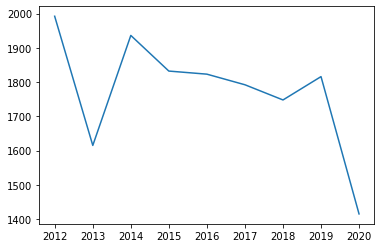

In [217]:
plt.plot(df_uk_ws_a['date'],df_uk_ws_a['value'])


## Checking the average values for each commodity and parameters

In [218]:
df.groupby('comdty')[['value']].mean()

,value
comdty,
Common spring wheat and spelt,200.442137
Common wheat and spelt,3960.682553
Common winter wheat and spelt,3810.671230
Durum wheat,331.409621
Wheat and spelt,4054.009985


In [219]:
df.groupby('param')[['value']].mean()

,value
param,
Area (cultivation/harvested/production) (1000 ha),1344.796624
EU standard humidity (%),14.000000
Harvested production in EU standard humidity (1000 t),8193.692522
Main area (1000 ha),NaN
Yield in EU standard humidity (tonne/ha),4.877947


There seems to be an absence of data about Main area (1000 ha)